# Sales Data Analysis

In this project, we're going to analyze the overall sales in a year for an electronics store. We'll go by months, categorize by cities, time of day and by the products to analyze the sales from different perspectives. We'll also visualize the data for better understanding.

### Importing necessary libraries

At first, we must import the basic libraries into our notebook, namely Pandas and Numpy.

In [1]:
import pandas as pd
import numpy as np

### Converting monthly CSV files into a singular file

For our datasets, we have them divided by months. For better and easier access, we must convert them all into a single csv file using the os and the glob libraries. After concatenating all the data into a single dataframe, we can save it as a csv file.

In [2]:
import os
import glob
os.chdir("./Sales_Data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

df = pd.concat([pd.read_csv(f) for f in all_filenames ])
df.to_csv( "df.csv", index=False, encoding='utf-8-sig')

Now, we open the saved csv file which stores all the data altogether.

In [3]:
df = pd.read_csv("df.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the data

In our dataframe, there are plenty of empty values and other errors which need cleaning. So, first, we drop all the null rows.

In [4]:
df = df.dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In the dataframe, there are rows containing irrelevant data, which must be omitted. We take a look at this erroronous data first.

In [5]:
new_df = df[df['Order Date'].str[0:2] == 'Or']

new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Now, we omit these false data and save the rest of the dataframe. We're now ready to begin analyzing the data.

In [6]:
df = df[df['Order Date'].str[0:2] != 'Or']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### 1. What was the best month for sales? How much was earned in that month?

For our first question, we focus on the monthly sales data.

### Add a month column

Since, the month column doesn't exist separately, we have to extract it from the order date, which is a string value. We can apply string methods to extract the month portion of the data and then convert it to a numeric type data.

In [7]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = pd.to_numeric(df['Month'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Next, we must multiply the quantity ordered with the price of each items to get the total amount of sales for each order. Before that, we must change the datatypes of those two columns into numeric datatypes.

In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


For data visualization, we need to import the matplotlib library. Then we can plot the month by sales amount line graph.

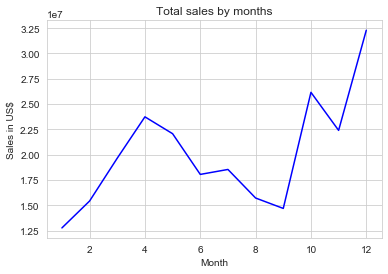

In [25]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('whitegrid')
monthly = df.groupby('Month')['Sales'].sum()
sns.lineplot(x=monthly.index, y=monthly, color="blue")
plt.ylabel('Sales in US$')
plt.title('Total sales by months')

plt.show()

Judging from the graph, the month with the highest amount of sales is December, followed by October. The reason could be that both the months of December and October have important holidays, like Christmas and Halloween, which might indicate the high amount of sales in these months.

### 2. Which city had the highest number of sales?

Now, we try and find out the sales data based on individual cities.

### Add a city column

To extract the city from the purchase address, let's define two functions - one for city and the other for the state. The city column will feature both the city and the state name as there exists cities with similar names in different states.

In [10]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: '{}, {}'.format(get_city(x), get_state(x)))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


It's time to visualize the sales data as per the city. This time we'll use bar graphs to visualize the data.

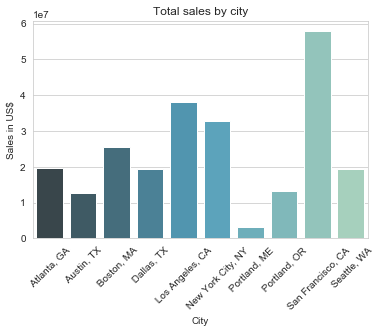

In [15]:
sns.set_style('whitegrid')

citywise = df.groupby('City')['Sales'].sum()
cwb = sns.barplot(x=citywise.index, y=citywise, palette="GnBu_d")
plt.ylabel('Sales in US$')
plt.title('Total sales by city')
cwb.set_xticklabels(cwb.get_xticklabels(), rotation=45)

plt.show()

From the graph, it's evident that the city with the highest amount of sales is San Francisco, followed by Los Angeles. Both cities are in the state of California. The area is known for a huge IT sector, especially the Greater San Francisco area. That could be a logical reason behind the amount of orders, given that ours is an electronics store.

### 3. What time of day should we display advertisements to ensure maximum sales?

Now, to analyze the data on the basis of the time of day, especially hourwise. That'll help us to understand the ideal time to advertise our products for maximum publicity.

First, we'll need to import the datetime library and then extract the hour portion from the order date and create a separate column for that.

In [18]:
import datetime as dt

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9


Now, to visualize the data per the hour and then display it in a line graph format.

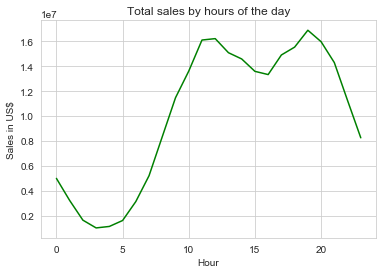

In [26]:
sns.set_style('whitegrid')

hourly = df.groupby('Hour')['Sales'].sum()
sns.lineplot(x=hourly.index, y=hourly, color="green")
plt.ylabel('Sales in US$')
plt.title('Total sales by hours of the day')

plt.show()

From the graph, it's evident that the popular hours for purchasing items is 10-11 in the morning and then at 7pm in the evening. So, now we can direct our advertisement team to target said hours in order to get maximum publicity for our store.

### 4. What products are the sold the most quantitywise? What are the highest mean prices among the products?

Now, we focus on which products get the highest revenue, first by quantity and then by the average price of the products.

First, we'll graph the products versus the quantity ordered in bar format.

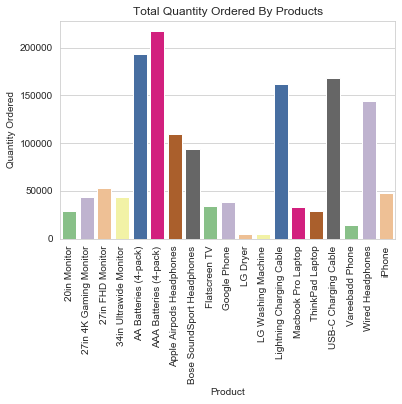

In [31]:
sns.set_style('whitegrid')

products = df.groupby('Product')['Quantity Ordered'].sum()
pro = sns.barplot(x=products.index, y=products, palette="Accent")
plt.ylabel('Quantity Ordered')
plt.title('Total Quantity Ordered By Products')
pro.set_xticklabels(pro.get_xticklabels(), rotation=90)

plt.show()

As per products versus quantity ordered graph, the highest amount sold are batteries - AAA and AA respectively. They're followed by two types of charging cables - USB-C and lightning respectively. All these products are cheap by nature, which might indicate the high number of orders for these items.

Now, to focus on products versus mean prices of products graph.

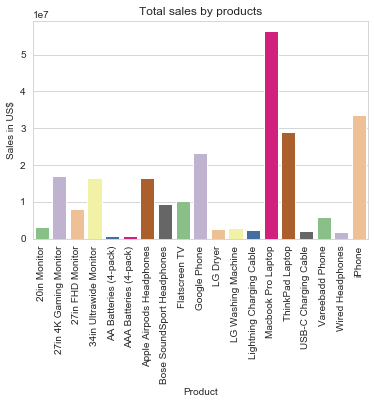

In [33]:
sns.set_style('whitegrid')

products2 = df.groupby('Product')['Sales'].sum()
pro2 = sns.barplot(x=products2.index, y=products2, palette="Accent")
plt.ylabel('Sales in US$')
plt.title('Total sales by products')
pro2.set_xticklabels(pro2.get_xticklabels(), rotation=90)

plt.show()

Interms of mean prices of products, the results are different to the quantity ordered. Here, the highest mean price is of a Macbook Pro Laptop, followed by the Thinkpad Laptop. Both of these items are very expensive, hence the mean price is quite astronomical compared to others, even if their order amounts are quite low compared to the other items.